In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


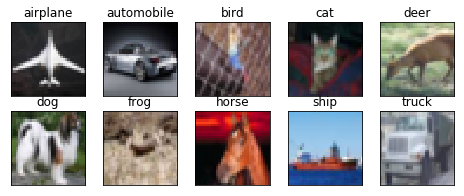

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, 1, 1))


model.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(10, 1, 1))

model.add(AveragePooling2D(pool_size = (4,4)))
model.add(Flatten())

model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/amit-scalled-without-ctot-f50-datagen@test.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=80, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerat

Epoch 1/50
390/390 [==============================] - 32s 83ms/step - loss: 1.3444 - acc: 0.5353 - val_loss: 1.2734 - val_acc: 0.5900

Epoch 00001: val_acc improved from -inf to 0.59000, saving model to /content/drive/My Drive/amit-scalled-without-ctot-f50-datagen@test.h5
Epoch 2/50
390/390 [==============================] - 30s 76ms/step - loss: 0.9428 - acc: 0.6837 - val_loss: 1.0061 - val_acc: 0.6715

Epoch 00002: val_acc improved from 0.59000 to 0.67150, saving model to /content/drive/My Drive/amit-scalled-without-ctot-f50-datagen@test.h5
Epoch 3/50
390/390 [==============================] - 30s 76ms/step - loss: 0.7922 - acc: 0.7402 - val_loss: 0.9375 - val_acc: 0.6898

Epoch 00003: val_acc improved from 0.67150 to 0.68980, saving model to /content/drive/My Drive/amit-scalled-without-ctot-f50-datagen@test.h5
Epoch 4/50
390/390 [==============================] - 30s 77ms/step - loss: 0.7038 - acc: 0.7742 - val_loss: 0.7144 - val_acc: 0.7804

Epoch 00004: val_acc improved from 0.689

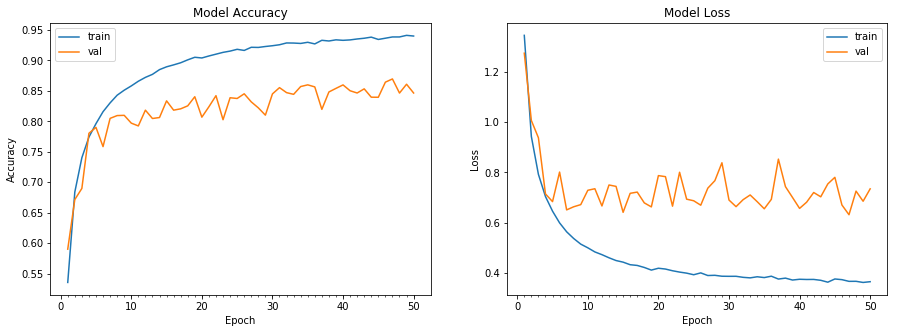

Accuracy on test data is: 84.66


In [0]:
# trained without cutout
from keras.preprocessing.image import ImageDataGenerator
import time
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,
                             zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = datagen.flow(test_features, test_labels, batch_size = 125),validation_steps=80, verbose=1, callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#### more training.

Epoch 1/50
  1/390 [..............................] - ETA: 47s - loss: 0.3725 - acc: 0.9297

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=80, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  import sys
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first

390/390 [==============================] - 30s 77ms/step - loss: 0.3609 - acc: 0.9424 - val_loss: 0.7076 - val_acc: 0.8601

Epoch 00001: val_acc did not improve from 0.86970
Epoch 2/50
390/390 [==============================] - 30s 76ms/step - loss: 0.3636 - acc: 0.9412 - val_loss: 0.7579 - val_acc: 0.8404

Epoch 00002: val_acc did not improve from 0.86970
Epoch 3/50
390/390 [==============================] - 30s 77ms/step - loss: 0.3637 - acc: 0.9420 - val_loss: 0.7042 - val_acc: 0.8581

Epoch 00003: val_acc did not improve from 0.86970
Epoch 4/50
390/390 [==============================] - 30s 76ms/step - loss: 0.3638 - acc: 0.9408 - val_loss: 0.7122 - val_acc: 0.8537

Epoch 00004: val_acc did not improve from 0.86970
Epoch 5/50
390/390 [==============================] - 30s 76ms/step - loss: 0.3749 - acc: 0.9385 - val_loss: 0.7251 - val_acc: 0.8503

Epoch 00005: val_acc did not improve from 0.86970
Epoch 6/50
390/390 [==============================] - 30s 76ms/step - loss: 0.3652 - a

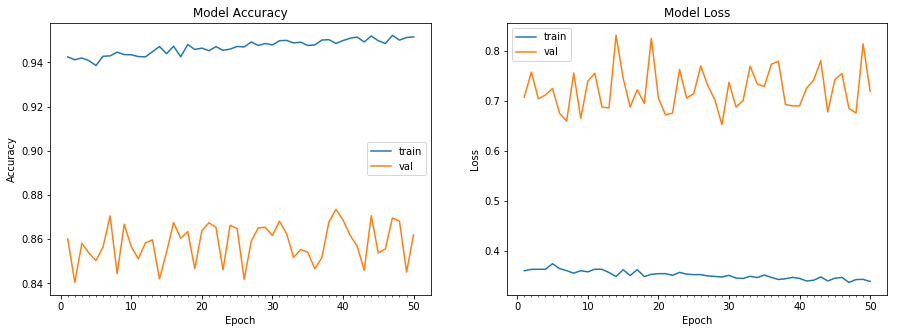

Accuracy on test data is: 86.19


In [0]:
start = time.time()

# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = datagen.flow(test_features, test_labels, batch_size = 125),
                                 validation_steps=80, verbose=1, callbacks=callbacks)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Cutout

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/amit-scalled-with-cutout.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=80, verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=99)`
  if sys.path[0] == '':


Epoch 1/99


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 33s 85ms/step - loss: 2.0409 - acc: 0.2749 - val_loss: 2.5371 - val_acc: 0.1456

Epoch 00001: val_acc improved from -inf to 0.14560, saving model to /content/drive/My Drive/amit-scalled-with-cutout.h5
Epoch 2/99
390/390 [==============================] - 30s 77ms/step - loss: 1.6377 - acc: 0.4172 - val_loss: 2.9247 - val_acc: 0.1946

Epoch 00002: val_acc improved from 0.14560 to 0.19460, saving model to /content/drive/My Drive/amit-scalled-with-cutout.h5
Epoch 3/99
390/390 [==============================] - 30s 77ms/step - loss: 1.4355 - acc: 0.4986 - val_loss: 2.4473 - val_acc: 0.2883

Epoch 00003: val_acc improved from 0.19460 to 0.28830, saving model to /content/drive/My Drive/amit-scalled-with-cutout.h5
Epoch 4/99
390/390 [==============================] - 30s 76ms/step - loss: 1.2673 - acc: 0.5649 - val_loss: 1.2289 - val_acc: 0.5888

Epoch 00004: val_acc improved from 0.28830 to 0.58880, saving model to /content/drive/My Drive/amit-scall

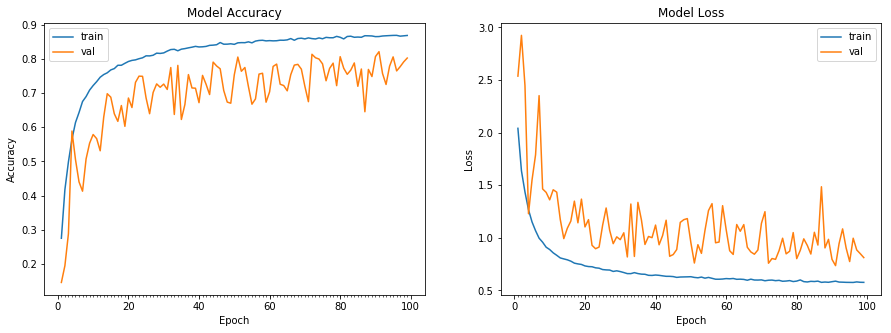

Accuracy on test data is: 84.21


In [0]:
# trained with cutout
from keras.preprocessing.image import ImageDataGenerator
import time
datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(), featurewise_center=True,
                             featurewise_std_normalization=True,
                             zoom_range=0.0, 
                             horizontal_flip=False)

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = datagen.flow(test_features, test_labels, batch_size = 125),validation_steps=80, verbose=1, callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### LR finder

In [0]:
from keras.callbacks import Callback

In [0]:
class LR_Finder(Callback):
# remove the print statements
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
#         pdb.set_trace()
        print('\n')
        print('Train Begin')
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        print('model optimizer lr', self.model.optimizer.lr)
        print('start lr', self.start_lr)
        print('Train Begin Blocks Ends \n')
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
#         pdb.set_trace()
        print('Batch end Begins \n')
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        print('iteration :', self.iteration)
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        print('avg loss',self.avg_loss)
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        print('smoothed_loss',smoothed_loss)
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        print('New LR : \n', lr)
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [0]:
bs = 200

In [0]:
# bs = 200
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(train_features.shape[0]/bs))
model.fit(train_features, train_labels, callbacks=[lr_finder] )

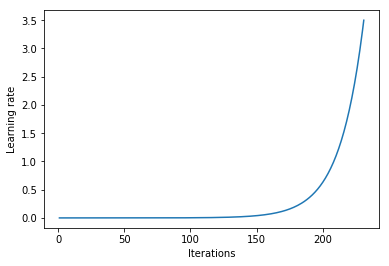

In [0]:
lr_finder.plot_lr()

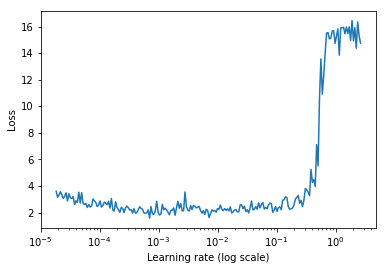

In [0]:
lr_finder.plot()

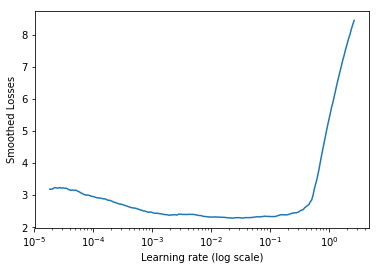

In [0]:
lr_finder.plot_smoothed_loss()

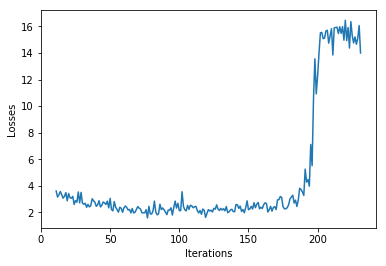

In [0]:
lr_finder.plot_loss()

In [11]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.03, momentum=0.9)
sgd.get_config()

{'decay': 0.0,
 'lr': 0.029999999329447746,
 'momentum': 0.8999999761581421,
 'nesterov': False}

**compiled & trained with sgd & momentum - without normalization & standardization**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=0, steps_per_epoch=250, epochs=100)`
  
W0721 01:31:14.991794 140192958633856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instruct

Model took 1080.78 seconds to train


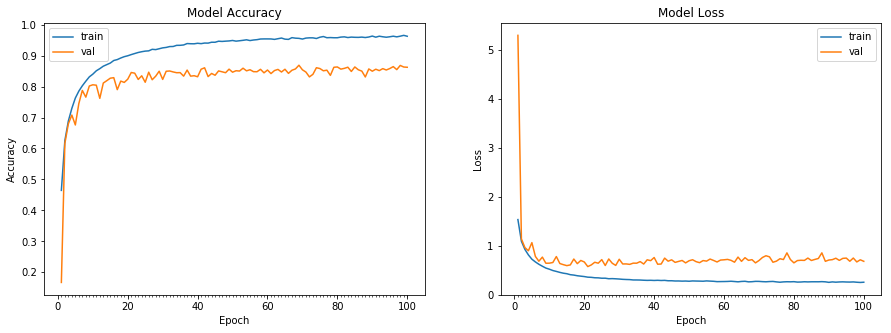

Accuracy on test data is: 86.23


In [12]:
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 200),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**compiled & trained with sgd & momentum + normalization & standardization**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., validation_steps=80, verbose=0, steps_per_epoch=250, epochs=100)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit 

Model took 1088.03 seconds to train


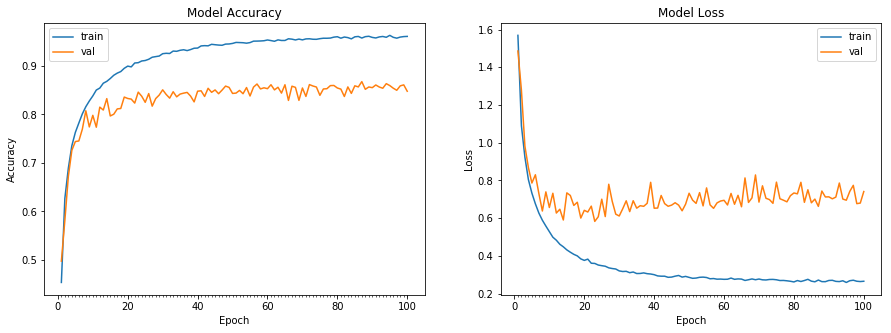

Accuracy on test data is: 84.75


In [82]:
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,featurewise_center=True,
                             featurewise_std_normalization=True)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 200),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = datagen.flow(test_features, test_labels, batch_size = 125),validation_steps=80, verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Max Val Acc without normalization & standardization**

In [13]:
np.max(model_info.history['val_acc'])

0.8689000022411346

**Max Val Acc without normalization & standardization**

In [83]:
np.max(model_info.history['val_acc'])

0.8673000015318394

In [0]:
(_, _), (_, class_labels) = cifar10.load_data()

In [0]:
preds = model.predict(test_features)
preds_index = np.argmax(preds,axis=1).tolist()

# to convert 2-d array to list 
class_labels = class_labels.ravel()

In [0]:
correct_index, misclassified_index = [],[]
for i in range(len(class_labels)):
  if preds_index[i] == class_labels[i]:
    correct_index.append(i)
  else:
    misclassified_index.append(i)

In [17]:
len(correct_index), len(misclassified_index)

(8623, 1377)

In [0]:
from keras.preprocessing import image
import cv2

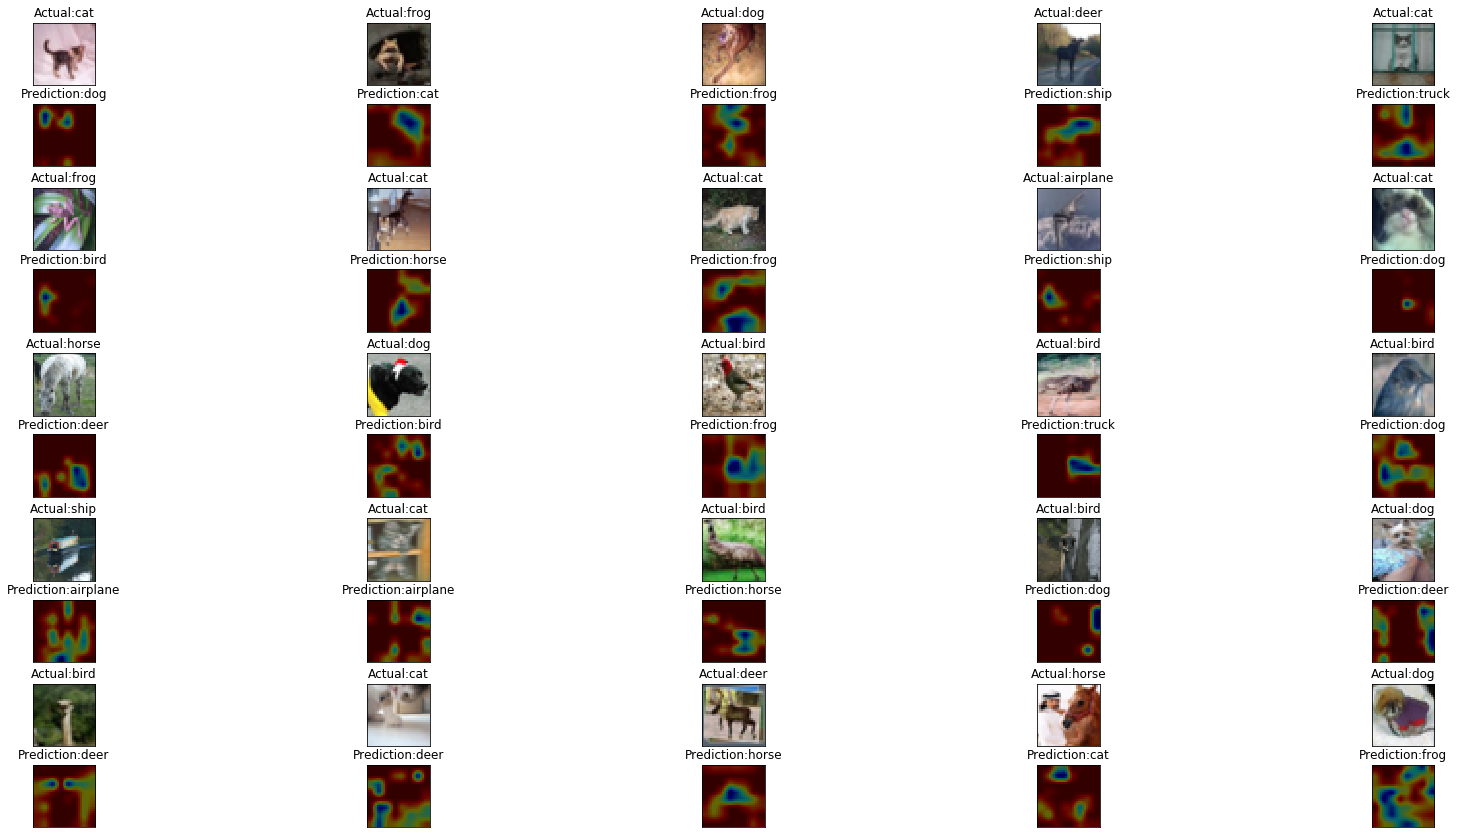

In [80]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30, 30))
for index, value in enumerate(np.random.choice(misclassified_index, size = 25)):
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_8")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for k in range(256):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(np.uint8(img), 0.6, heatmap, 0.4, 0)
  
  imgs=[img, superimposed_img]
  outer = gridspec.GridSpec(10, 5, wspace=0.0, hspace=0.15)
  inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                  subplot_spec=outer[index], wspace=0.0, hspace=0.30)
  titles=['Actual:'+class_names[np.argmax(test_labels[value])], 'Prediction:'+class_names[class_idx]]
  for j in range(2):
      ax = plt.Subplot(fig, inner[j])
      ax.imshow(imgs[j])
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(titles[j])
      fig.add_subplot(ax)
  
fig.show()